In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

path = "D:\Kegiatan\Satria Data 2022\BDC03\strain_fktp.csv"
df = pd.read_csv(path, header=None)
nama_kolom = ["PSTV01","PSTV02","PSTV15","FKP02","FKP03","FKP04","FKP05","FKP06","FKP07","FKP08","FKP09","FKP10",
"FKP11","FKP12","FKP14",'FKP14A','FKP15','FKP15A','FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22','FKP13Class']
df.columns = nama_kolom

In [16]:
dfd = df[["FKP05","FKP07","FKP08","FKP09","FKP10","FKP11","FKP12","FKP14",'FKP16','FKP18','FKP19','FKP20','FKP21','FKP22','FKP13Class']]
dfd.head()

,FKP05,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,61,3,1,4,1,12.0,2,9999,98,98,98,98,98,2,Sehat
1,51,9,3,2,1,1.0,4,773,98,98,98,98,98,1,Belum_Sehat
2,35,9,2,1,1,3.0,4,1757,98,98,98,98,98,1,Belum_Sehat
3,34,3,1,4,1,1.0,5,621,98,98,98,98,98,1,Belum_Sehat
4,35,3,1,4,1,1.0,1,622,98,98,98,98,98,1,Belum_Sehat


In [3]:
cleanup_nums = {"FKP13Class":     {"Memantine": 1.0, "Saline": 2.0}}
dfd.replace(cleanup_nums, inplace=True)
dfd.head()
dfd.dtypes

c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


FKP05          int64
FKP07          int64
FKP08          int64
FKP09          int64
FKP10          int64
FKP12          int64
FKP14          int64
FKP16          int64
FKP18          int64
FKP19          int64
FKP20          int64
FKP21          int64
FKP22          int64
FKP13Class    object
dtype: object

In [26]:
X = dfd.drop("FKP13Class",1)   #Feature Matrix
y = dfd["FKP13Class"]          #Target Variable
y[y == "Sehat"] = 1
y[y == "Belum_Sehat"] = 0
y=y.astype('int')
X=X.astype('int')
print(y)
print(X)
print(X.dtypes)
column_name = list(X.columns) 

C:\Users\FADLAN~1\AppData\Local\Temp/ipykernel_18576/966071792.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dfd.drop("FKP13Class",1)   #Feature Matrix
C:\Users\FADLAN~1\AppData\Local\Temp/ipykernel_18576/966071792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == "Sehat"] = 1
c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\FADLAN~1\AppData\Local\Temp/ipykernel_18576/

0          1
1          0
2          0
3          0
4          0
          ..
4056893    1
4056894    0
4056895    1
4056896    0
4056897    1
Name: FKP13Class, Length: 4056898, dtype: int32
         FKP05  FKP07  FKP08  FKP09  FKP10  FKP11  FKP12  FKP14  FKP16  FKP18  \
0           61      3      1      4      1     12      2   9999     98     98   
1           51      9      3      2      1      1      4    773     98     98   
2           35      9      2      1      1      3      4   1757     98     98   
3           34      3      1      4      1      1      5    621     98     98   
4           35      3      1      4      1      1      1    622     98     98   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4056893     35      9      3      2      1     12      4   9999     98     98   
4056894     35      9      2      1      1      1      5    561     35      9   
4056895     11      4      2      1      1     13      5   9999     98     98   

In [35]:
import numpy as np
X["FKP05"] = X["FKP05"].astype(str).str[0]
X["FKP14"] = np.where(X["FKP14"] == 9999, 1, 2)
X["FKP16"] = np.where(X["FKP16"] == 98, 1, 2)
X["FKP21"] = np.where(X["FKP21"] == 98, 1, 2)
dfd["FKP11"].fillna(value = dfd["FKP14"].mode()[0], inplace=True)
dfd.isnull().sum()
X = X.astype("int")
X.tail()

c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,FKP05,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP18,FKP19,FKP20,FKP21,FKP22
4056893,3,9,3,2,1,12,4,2,2,98,98,98,1,2
4056894,3,9,2,1,1,1,5,2,2,9,2,14,2,1
4056895,1,4,2,1,1,13,5,2,2,98,98,98,1,2
4056896,7,3,1,3,1,1,2,2,2,98,98,98,1,1
4056897,7,3,1,4,1,13,2,2,2,98,98,98,1,2


In [125]:
X = np.array(X)
y = np.array(y)
X

array([[ 3,  1,  4, ..., 98, 98,  2],
       [ 9,  3,  2, ..., 98, 98,  1],
       [ 9,  2,  1, ..., 98, 98,  1],
       ...,
       [ 4,  2,  1, ..., 98, 98,  2],
       [ 3,  1,  3, ..., 98, 98,  1],
       [ 3,  1,  4, ..., 98, 98,  2]])

In [126]:
from sklearn import preprocessing
normalized = preprocessing.normalize(X)
normalized

array([[0.01529896, 0.00509965, 0.02039861, ..., 0.49976589, 0.49976589,
        0.0101993 ],
       [0.0458492 , 0.01528307, 0.01018871, ..., 0.49924681, 0.49924681,
        0.00509436],
       [0.04585396, 0.01018977, 0.00509488, ..., 0.49929865, 0.49929865,
        0.00509488],
       ...,
       [0.02039436, 0.01019718, 0.00509859, ..., 0.49966194, 0.49966194,
        0.01019718],
       [0.01530035, 0.00510012, 0.01530035, ..., 0.49981138, 0.49981138,
        0.00510012],
       [0.01529896, 0.00509965, 0.02039861, ..., 0.49976589, 0.49976589,
        0.0101993 ]])

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(3, input_shape=(2,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 3)                 9         
_________________________________________________________________
activation_14 (Activation)   (None, 3)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 4         
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
pd.unique(df['FKP21'])
#len(pd.unique(X['FKP11']))

array([98, 99], dtype=int64)

c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


FKP05    int32
FKP07    int32
FKP08    int32
FKP09    int32
FKP10    int32
FKP12    int32
FKP14    int32
FKP16    int32
FKP18    int32
FKP19    int32
FKP20    int32
FKP21    int32
FKP22    int32
dtype: object

In [27]:
'''from pickle import TRUE

#categorical_cols=[col for col in X.select_dtypes(include='object').columns.tolist()]
col = ["FKP22","FKP10","FKP07","FKP12","FKP14"]
onehot=pd.get_dummies(X[col])
onehot.head()'''

,FKP14,FKP22_1,FKP22_2,FKP10_1,FKP10_2,FKP10_3,FKP07_1,FKP07_2,FKP07_3,FKP07_4,FKP07_5,FKP07_6,FKP07_7,FKP07_8,FKP07_9,FKP12_1,FKP12_2,FKP12_3,FKP12_4,FKP12_5
0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


[0.01711478 0.01100623 0.00345328 0.03414452 0.00694195 0.40835983
 0.00681657 0.00157469 0.00539247 0.00541142 0.49978426]


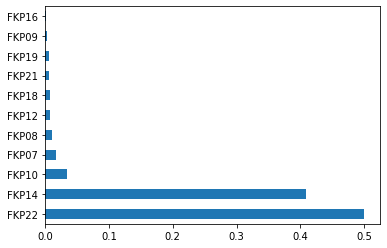

In [13]:
'''import pandas as pd
import numpy as np


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()'''

In [94]:
'''#X_fix = onehot
y[y == "Sehat"] = 1
y[y == "Belum_Sehat"] = 0
y=y.astype('int')
X=X.astype('int')
print(y)
print(X)'''

C:\Users\FADLAN~1\AppData\Local\Temp/ipykernel_14892/1041570686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == "Sehat"] = 1
c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\FADLAN~1\AppData\Local\Temp/ipykernel_14892/1041570686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0          1
1          0
2          0
3          0
4          0
          ..
4056893    1
4056894    0
4056895    1
4056896    0
4056897    1
Name: FKP13Class, Length: 4056898, dtype: int32
         FKP07  FKP08  FKP09  FKP10  FKP12  FKP14  FKP16  FKP18  FKP19  FKP20  \
0            3      1      4      1      2      2      0     98     98     98   
1            9      3      2      1      4      2      0     98     98     98   
2            9      2      1      1      4      2      0     98     98     98   
3            3      1      4      1      5      2      0     98     98     98   
4            3      1      4      1      1      2      0     98     98     98   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4056893      9      3      2      1      4      2      0     98     98     98   
4056894      9      2      1      1      5      2      3      9      2     14   
4056895      4      2      1      1      5      2      0     98     98     98   

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6,random_state=300)

In [29]:
#from sklearn.linear_model import LogisticRegression #0,99640
#from sklearn.ensemble import RandomForestClassifier #0,996637
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier #0,996636
#import xgboost as xgb #0,996635
from pyexpat import earth

#model=LogisticRegression(C=0.1, solver='lbfgs')
#model = RandomForestClassifier()
model.fit(X_train,y_train)
#model.fit(X_train,y_train, epochs=5)
"""
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(C=0.1, solver='newton-cg')
model1.fit(X_train,y_train)

from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(C=0.1, solver='saga')
model2.fit(X_train,y_train)"""

"\nfrom sklearn.linear_model import LogisticRegression\nmodel1=LogisticRegression(C=0.1, solver='newton-cg')\nmodel1.fit(X_train,y_train)\n\nfrom sklearn.linear_model import LogisticRegression\nmodel2=LogisticRegression(C=0.1, solver='saga')\nmodel2.fit(X_train,y_train)"

In [30]:
#print(classification_report(y_test,model.predict(X_fixx)))
import sklearn
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
f1_nilai=sklearn.metrics.f1_score(y_test, model.predict(X_test))
#f1_score1=sklearn.metrics.f1_score(y_test, y_pred1)
#f1_score2=sklearn.metrics.f1_score(y_test, y_pred2)
#f1_score_clf=sklearn.metrics.f1_score(y_test, y_pred3)

print(f1_nilai)
#print(f1_score_clf)
print(classification_report(y_test, model.predict(X_test)))

0.996629556557685
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1580204
           1       1.00      0.99      1.00    853935

    accuracy                           1.00   2434139
   macro avg       1.00      1.00      1.00   2434139
weighted avg       1.00      1.00      1.00   2434139



In [39]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import math
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='lbfgs'))
model_pipeline.append(SVC())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(xgb.XGBClassifier())
model_list = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive Bayes','XGBoost'] 
acc_list = []
auc_list = []
cm_list = []
f1_score_list = []
RMSE_list = []
logloss_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = math.sqrt(MSE)
    RMSE_list.append(RMSE)
    logloss = log_loss(y_test, y_pred)
    logloss_list.append(logloss)
result_a = pd.DataFrame({'Model':model_list, 'Accuracy':acc_list, 'AUC':auc_list, 'Confsuion Matrix':cm_list, 
                        'F1 Score':f1_score_list, 'RMSE':RMSE_list, 'Log Loss':logloss_list})
print(result_a)'''

c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

X_test_bdc = pd.read_csv("D:\Kegiatan\Satria Data 2022\BDC03\stest_fktp.csv", header=None)
nama_kolom2 = ["PSTV01","PSTV02","PSTV15","FKP02","FKP03","FKP04","FKP05","FKP06","FKP07","FKP08","FKP09","FKP10",
"FKP11","FKP12","FKP14",'FKP14A','FKP15','FKP15A','FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22']
X_test_bdc.columns = nama_kolom2

X_test_bdcc = X_test_bdc[["FKP07","FKP08","FKP09","FKP10","FKP12","FKP14",'FKP18','FKP19','FKP21','FKP22']]
X_test_bdcc = X_test_bdcc.astype('object')

X_test_bdcc["FKP14"] = np.where(X_test_bdcc["FKP14"] == 9999, 1, 2)

'''from pickle import TRUE
col = ["FKP22","FKP10","FKP07","FKP12","FKP14"]
dummy=pd.get_dummies(X_test_bdcc[col])'''


#print(dummy)
#X_fixx = dummy

y_pred=model.predict(X_test_bdcc)
print(y_pred)



c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[1 1 1 ... 0 0 0]


In [ ]:
y_pred[y_pred == "Sehat"] = 1
y_pred[y_pred == "Belum_Sehat"] = 0
y_pred


In [17]:
submission = pd.read_csv("D:\Kegiatan\Satria Data 2022\BDC03\submission.csv")
submission["Status"]=y_pred
submission

c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [18]:
submission.to_csv('submissionfix.csv',index=False)

In [35]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score


y_pred=model.predict(X_test)
#y_pred1=model1.predict(X_test)
#y_pred2=model2.predict(X_test)
#y_pred3=clf.predict(X_test)



In [19]:
import pandas as pd
import numpy as np
sub = pd.read_csv('D:\Kegiatan\Satria Data 2022\BDC03\submissionfix.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014225 entries, 0 to 1014224
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1014225 non-null  int64 
 1   FKP02       1014225 non-null  object
 2   Status      1014225 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 23.2+ MB


c:\Users\Fadlan Amin\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
sub[sub.columns[0]]=sub[sub.columns[0]].astype('string', copy=False)
sub["FKP02"]=sub["FKP02"].astype('string', copy=False)
sub.rename(columns = {'Unnamed: 0':''}, inplace = True)
print(sub.dtypes)
sub

          string
FKP02     string
Status     int64
dtype: object


,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [21]:
import csv
sub.to_csv('subfix.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)